In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import savgol_filter
import glob as gb
from functools import reduce
from scipy.optimize import curve_fit
import matplotlib.ticker as ticker
import numpy as np
plt.style.use('classic')

In [41]:
## Canvas parameters

# Get current size
fig_size = plt.rcParams["figure.figsize"]

# Set figure width to 9 and height to 6
fig_size[0] = 10
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size

<IPython.core.display.Javascript object>


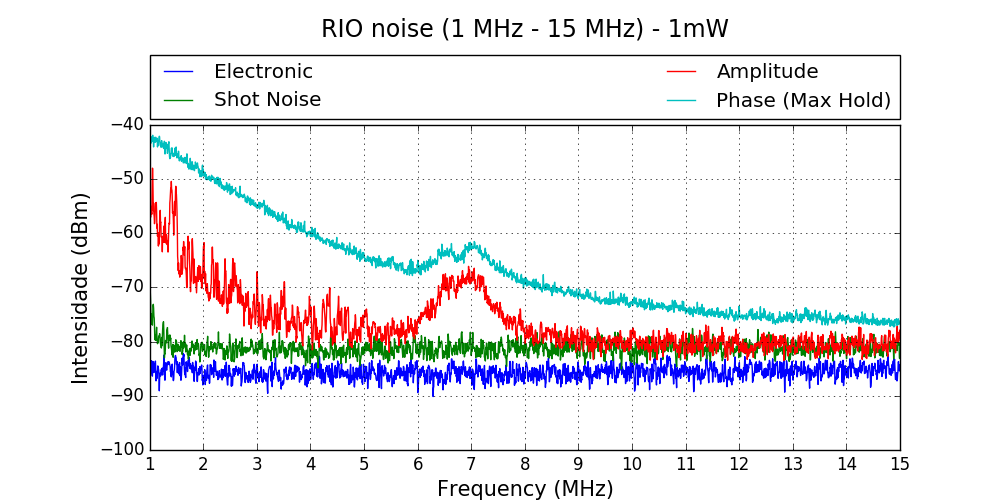

In [61]:
## Getting data from files of OS and ESA

cols1 = ['f','RE', 'ShotNoise', 'RAmp']
cols2 = ['f','RE', 'ShotNoise', 'RPh']

ESA1 = pd.read_csv("F1_15MHZ-A.CSV", sep=',', skiprows=range(0, 16), 
                                   header=None,names=cols1) # no cavity
ESA2 = pd.read_csv("F1_15MHZ-B.CSV", sep=',', skiprows=range(0, 16), 
                                   header=None,names=cols2) # with cavity


#files = [x for y in [OS1, OS2, OS3, OS4, OS5, OS6] for x in y] # Flat list

data_noise = reduce(lambda x,y: pd.concat([x,y], axis=1), 
                   (ESA1, ESA2.RPh)) # PZT & Peaks

noise_labels = {'RE': "Electronic", 'ShotNoise': "Shot Noise",
                'RAmp': "Amplitude",'RPh': "Phase (Max Hold)"}

f = plt.figure()
plt.subplots_adjust(top = 0.75, hspace=0.6, left  = 0.15)

ax = plt.subplot(111)

data_noise.f *= 1E-6 # freq to MHz
data_noise.rename(columns=noise_labels, copy=False).plot('f', kind='line', ax=ax)

ax.set_title('RIO noise (1 MHz - 15 MHz) - 1mW', y=1.25, size=17)
ax.set_xlabel('Frequency (MHz)', size=15)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.set_ylabel('Intensidade (dBm)', size=15)
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax.grid(True)


h1, l1 = ax.get_legend_handles_labels()
ax.legend(h1, l1, 
           bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=2, 
           mode="expand", borderaxespad=0.)

plt.savefig('noise_1-15.svg', bbox_inches='tight', dpi=300)